<h1 style="text-align: center;">Machine Learning and Statistics Project </h1>

 ***
 
 Author: Brid Kennedy
 
 Date: December 2023

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.calibration import calibration_curve
from sklearn.model_selection import learning_curve




# Project Brief

## Overview
The project involves creating a notebook exploring classification algorithms applied to the iris flower dataset associated with Ronald A Fisher. The dataset is available from [UC Irvine](http://archive.ics.uci.edu/ml/datasets/Iris).

## Objectives
1. **Supervised Learning and Classification:**
   - Explain the concept of supervised learning.
   - Define classification algorithms.

2. **Implementation with scikit-learn:**
   - Describe at least one common classification algorithm.
   - Implement the chosen algorithm using the scikit-learn Python library.

3. **Visualization and Explanation:**
   - Use appropriate plots, mathematical notation, and diagrams to explain relevant concepts.



# Iris Classes Overview

Below are images of the three Iris classes for which data has been collected. Within the three classes of Iris, there are 50 measurements for each of the variables: sepal length, sepal width, petal length, and petal width. Sepals and Petals are labeled in the image below.

![Iris Classes](https://miro.medium.com/max/1400/1*nfK3vGZkTa4GrO7yWpcS-Q.png)

*Image sourced from [source](https://miro.medium.com/max/1400/1*nfK3vGZkTa4GrO7yWpcS-Q.png).*


# Supervised Learning and Classification 

## Introduction

In the field of machine learning, supervised learning is a technique for learning from labeled data. It involves training a model on a set of input data with known corresponding outputs, enabling the model to make predictions on new, unseen data. Classification is a specific type of supervised learning task that aims to classify data points into one of a finite set of categories.

## Supervised Learning

Supervised learning algorithms learn from labeled data, which consists of pairs of input data and their corresponding outputs. The algorithm analyzes the patterns in the data to identify relationships between the inputs and outputs. This allows the algorithm to make predictions on new, unseen data, assuming that the relationships observed in the training data hold true for the new data as well.

## Classification Algorithms
Classification algorithms are a subcategory of supervised learning algorithms that are specifically designed to assign data points to predefined categories. These algorithms learn from labeled data, identifying patterns that distinguish between different categories. When presented with new data, the algorithm estimates the probability of each category and assigns the data point to the category with the highest probability


# Classification Algorithms

### K-Nearest Neighbor (KNN)
KNN is a supervised learning technique used for classification and regression. In the context of classification, KNN predicts the label of a data point based on the labels of its nearest neighbors. It identifies the label of the data before making predictions. The algorithm utilizes measurements such as sepal length, sepal width, petal length, and petal width in the case of the Iris dataset. The number of neighbors can be user-defined (k-nearest neighbor learning) or vary based on the local density of points (radius-based neighbor learning).

*Reference: [scikit-learn documentation](https://scikit-learn.org/stable/modules/neighbors.html)*

### Support Vector Machine (SVM)
Support Vector Machine (SVM) is a powerful algorithm for both binary and multiclass classification tasks. It aims to find a hyperplane in N-dimensions that classifies data points. SVM is effective for the Iris dataset, where the goal is to classify iris flowers into different species. The algorithm maximizes the margin between classes, providing accurate predictions. The image below visualizes SVM applied to the Iris dataset:

![SVM image](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png)

### Naïve Bayes
Naïve Bayes is a fast and straightforward classification algorithm based on Bayes' theorem. It assumes that each variable contributes independently and equally to the outcome. Gaussian Naïve Bayes, a specific application, assumes features follow a normal distribution. While Naïve Bayes may not apply to all real-life problems, it is well-suited for multiclass classification tasks like the Iris dataset.

### Decision Tree
Decision Tree is a commonly used supervised learning technique for regression and classification. It involves drawing a tree figure where features are decision nodes, and outputs are leaf nodes. Decision Trees are known for their simplicity and interpretability. The algorithm uses methods like Gini index and information gain to select the best attributes. Here's an example of a Decision Tree:

![Decision tree example](https://scikit-learn.org/stable/_images/iris.svg)

### Random and Rotation Forest
Random Forest is an ensemble learning model composed of many decision trees, providing more accurate and stable predictions. Rotation Forest involves rotating the feature space to enhance the diversity of base learners. While Random Forest is more common, Rotation Forest can be explored for specific applications.

*References:*
- [scikit-learn documentation](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)
- [Ak, M.F. A Comparative Analysis of Breast Cancer Detection and Diagnosis Using Data Visualization and Machine Learning Applications. Healthcare 2020, 8, 111.](https://doi.org/10.3390/healthcare8020111)


### This project will examine a range of machine learning algorithms, train a set of classifiers on the dataset (using SKLearn etc.) and present classification performance results comparing the three algorithms on the Iris Dataset in this progect


# Visualise the Data

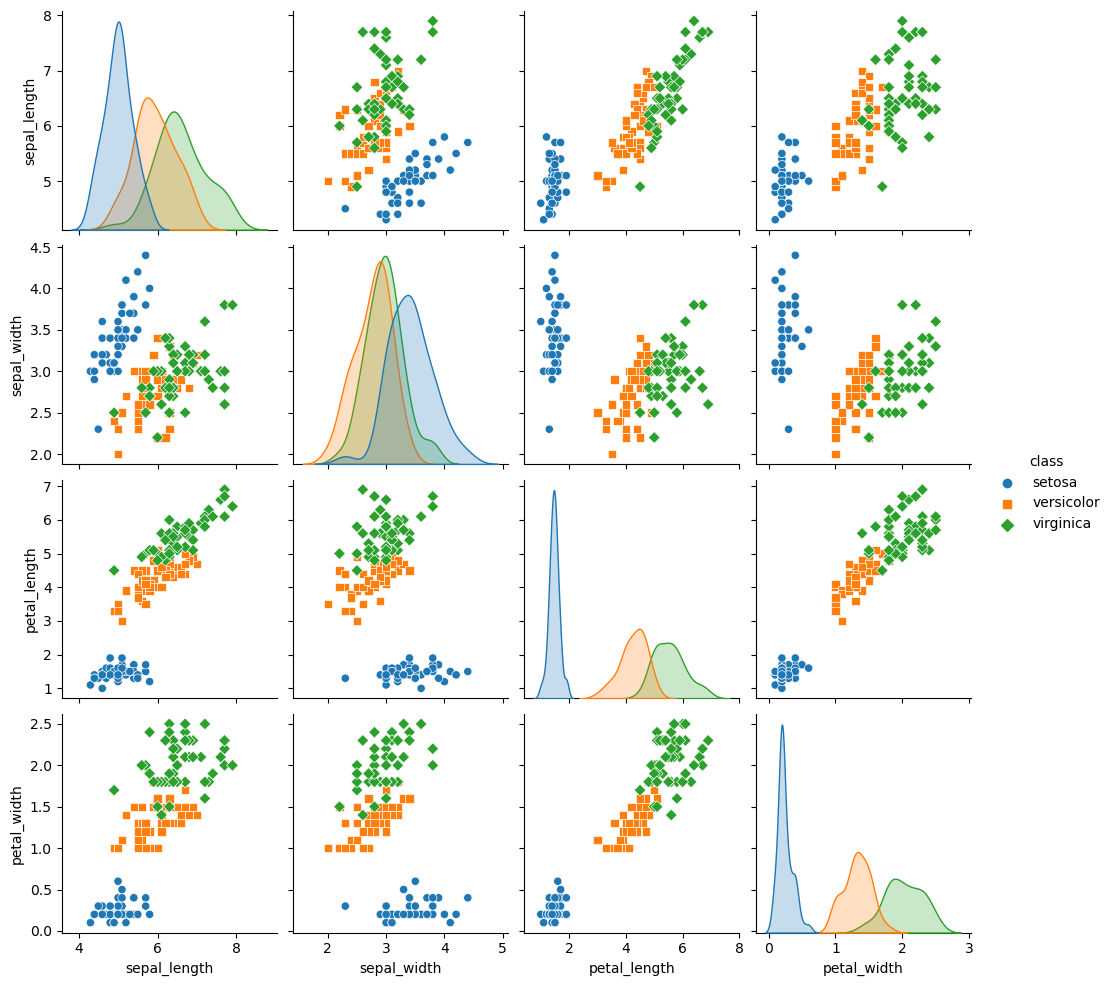

In [41]:
# Load the Iris dataset from the CSV file
iris_path = 'data/iris.csv' 
iris = pd.read_csv(iris_path)

# Pairplot to visualize relationships between features
sns.pairplot(iris, hue='class', markers=["o", "s", "D"])
plt.show()

In [42]:
# Display the column names
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')


# Classification Algorithm: Support Vector Machine (SVM) implementation with Scikit-learn

In [43]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    iris.drop('class', axis=1),
    iris['class'],
    test_size=0.2,
    random_state=42
)

In [44]:
# Initialize SVM model
svm_model = SVC(kernel='linear', C=1)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
predictions = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


c:\Users\bridc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


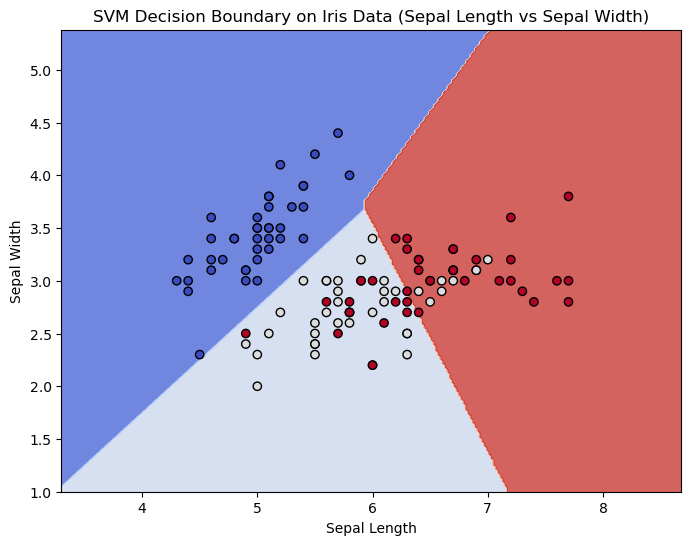

In [45]:
# Visualizing Decision Boundary for SVM
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    iris[['sepal_length', 'sepal_width']],  # Using only the first two features for visualization
    iris['class'],
    test_size=0.2,
    random_state=42
)

# Label encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Initialize SVM model
svm_model = SVC(kernel='linear', C=1)

# Train the model
svm_model.fit(X_train, y_train_encoded)

# Visualizing Decision Boundary for SVM
plt.figure(figsize=(8, 6))

# Plotting decision regions
h = .02  # Step size in the mesh
x_min, x_max = X_train['sepal_length'].min() - 1, X_train['sepal_length'].max() + 1
y_min, y_max = X_train['sepal_width'].min() - 1, X_train['sepal_width'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Convert Z to float to avoid the TypeError
Z = Z.astype(float)

# Use encoded labels for plotting
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train['sepal_length'], X_train['sepal_width'], c=y_train_encoded, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')

plt.title('SVM Decision Boundary on Iris Data (Sepal Length vs Sepal Width)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.show()



The above code demonstrates the use of a linear SVM for classification on the Iris dataset, including training, prediction, and evaluation. 

1. The accuracy is 1.0, which means the model achieved 100% accuracy on the test set. In other words, all predictions made by the model matched the actual labels in the test data.

2. Confusion Matrix:
The confusion matrix is a table that summarizes the performance of a classification algorithm. In this case, the matrix is a 3x3 matrix since there are three classes (setosa, versicolor, and virginica).

True Positives (TP):

10 instances of class 0 (setosa) were correctly classified.
9 instances of class 1 (versicolor) were correctly classified.
11 instances of class 2 (virginica) were correctly classified.
False Positives (FP):

There are no false positives (instances that were incorrectly classified as positive).
False Negatives (FN):

There are no false negatives (instances that were incorrectly classified as negative).
True Negatives (TN):

All instances not mentioned in the matrix are true negatives.
3. Interpretation:
The perfect confusion matrix (all diagonal elements are non-zero) and accuracy of 1.0 indicate that the SVM model performed exceptionally well on the test set. It correctly classified all instances across all three classes, suggesting that the model is a good fit for the Iris dataset.

In the plot only 2 features can be visualised at a time, the decision regions are shown in different colors, and the data points are scattered with markers based on their encoded class labels.

This visualization helps to understand how the SVM model separates the different classes in the feature space defined by sepal length and sepal width. The decision boundary is the line that separates the regions assigned to different classes.

# Logistic Regression is another popular classification algorithm that works well for binary and multiclass classification problems.

In [59]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    iris.drop('class', axis=1),
    iris['class'],
    test_size=0.2,
    random_state=42
)

In [60]:
# Initialize Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
logistic_predictions = logistic_model.predict(X_test)

# Evaluate the model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_conf_matrix = confusion_matrix(y_test, logistic_predictions)

print(f'Logistic Regression Accuracy: {logistic_accuracy}')
print('Logistic Regression Confusion Matrix:')
print(logistic_conf_matrix)

Logistic Regression Accuracy: 1.0
Logistic Regression Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In the above code for Logistic regression:

We import the LogisticRegression class from scikit-learn.
Initialize the logistic regression model with max_iter (maximum number of iterations for optimization) and random_state for reproducibility.
Train the model using the training data.
Make predictions on the test data.
Evaluate the model by calculating accuracy and generating a confusion matrix.

### The results are identical to the SVM performance

c:\Users\bridc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


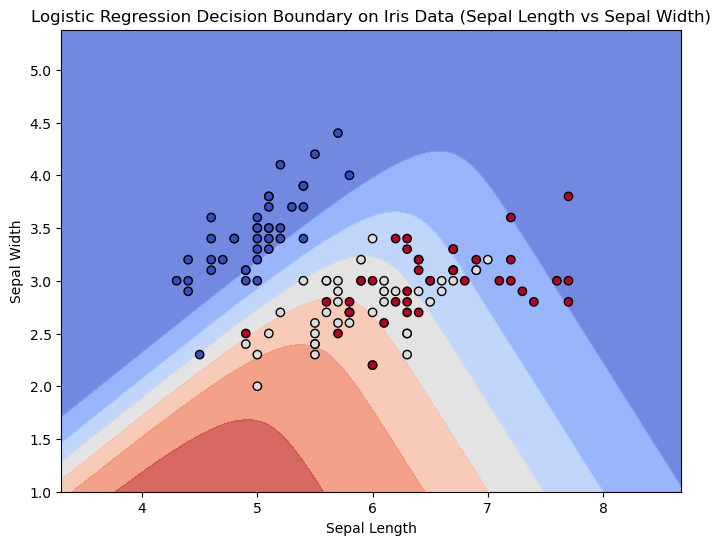

In [63]:
# Visualizing Decision Boundary for Logistic Regression
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    iris[['sepal_length', 'sepal_width']],  # Using only the first two features for visualization
    iris['class'],
    test_size=0.2,
    random_state=42
)

# Initialize Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
logistic_predictions = logistic_model.predict(X_test)


plt.figure(figsize=(8, 6))

# Plotting decision regions
h = .02  # Step size in the mesh
x_min, x_max = X_train['sepal_length'].min() - 1, X_train['sepal_length'].max() + 1
y_min, y_max = X_train['sepal_width'].min() - 1, X_train['sepal_width'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Use only two features for prediction
Z = logistic_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot decision regions based on probabilities
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Scatter plot of training data points
plt.scatter(X_train['sepal_length'], X_train['sepal_width'], c=y_train_encoded, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')

plt.title('Logistic Regression Decision Boundary on Iris Data (Sepal Length vs Sepal Width)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.show()




To plot the decision boundary for Logistic Regression I followed a similar approach as I took for SVM, . However, Logistic Regression is a binary classifier, and for visualization, I've considered only two classes.  The decision boundary is overlaid on the scatter plot of training data points. 

Decision Boundary:

The shaded area represents the decision boundary of the logistic regression model. This boundary separates different regions of the input feature space. In this case, it's the area where the model predicts a higher probability of being in the positive class (e.g., 'setosa'). Outside this area, the model predicts a lower probability.
Scatter Plot:

The scatter plot shows the training data points. Each point corresponds to an observation in the training dataset. The color of each point represents the true class of the observation. For example, 'setosa' points might be marked in one color, 'versicolor' in another, and 'virginica' in another.
X and Y Axes:

The x-axis represents the 'Sepal Length,' and the y-axis represents the 'Sepal Width.' These are the two features used to train and visualize the logistic regression model.
Now, let's interpret the decision boundary in the context of the scatter plot:

Points inside the shaded area are where the logistic regression model predicts a higher probability of being in the positive class ('setosa'). These are the regions where the algorithm is confident that the observation belongs to the 'setosa' class.

Points outside the shaded area are where the model predicts a lower probability of being in the positive class. These are areas where the model is less confident about classifying observations as 'setosa.' 

In [58]:
print(X_train.columns)

Index(['sepal_length', 'sepal_width'], dtype='object')


c:\Users\bridc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


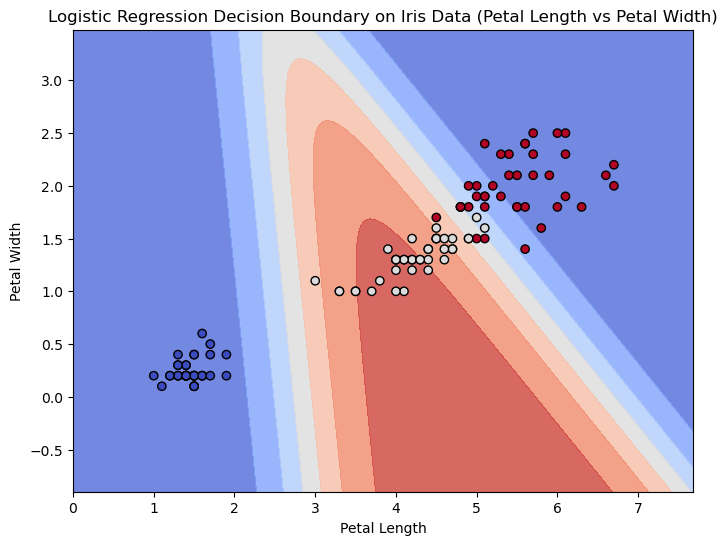

In [64]:

# Visualizing Decision Boundary for Logistic Regression
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    iris[['petal_length', 'petal_width']],  # Using only the first two features for visualization
    iris['class'],
    test_size=0.2,
    random_state=42
)

# Initialize Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
logistic_predictions = logistic_model.predict(X_test)# Visualizing Decision Boundary for Logistic Regression
plt.figure(figsize=(8, 6))

# Plotting decision regions
h = .02  # Step size in the mesh
x_min, x_max = X_train['petal_length'].min() - 1, X_train['petal_length'].max() + 1
y_min, y_max = X_train['petal_width'].min() - 1, X_train['petal_width'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Use only two features for prediction
Z = logistic_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot decision regions based on probabilities
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Scatter plot of training data points
plt.scatter(X_train['petal_length'], X_train['petal_width'], c=y_train_encoded, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')

plt.title('Logistic Regression Decision Boundary on Iris Data (Petal Length vs Petal Width)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.show()


Those two feature petal length and width do appear to give a cleaner decision boundary

The Iris dataset is a well-behaved dataset that is often used for educational purposes and model testing. Due to its simplicity and separability of classes, many classification algorithms perform well on it, often achieving high accuracy. However, this characteristic also makes it less suitable for identifying algorithms that perform poorly or demonstrating significant differences between models. I will try using decision tree with a shallow depth

In [65]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    iris.drop('class', axis=1),
    iris['class'],
    test_size=0.2,
    random_state=42
)

# Initialize a Decision Tree model with a shallow depth
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions
tree_predictions = tree_model.predict(X_test)

# Evaluate the model
tree_accuracy = accuracy_score(y_test, tree_predictions)
tree_conf_matrix = confusion_matrix(y_test, tree_predictions)

print(f'Decision Tree Accuracy: {tree_accuracy}')
print('Decision Tree Confusion Matrix:')
print(tree_conf_matrix)

Decision Tree Accuracy: 1.0
Decision Tree Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Still perfect accuracy. It is making me concerned that the train test split has messed up in some way and the algorithms are training on test data or testing on training data. Although since the Iris dataset is well structured simple algorithms may achieve high accuracy due to the dataset's characteristics.

However, I want to explore scenarios where a model might not perform as well, I will attempt introducing random noise to the existing dataset. Additionally, I could create imbalances in class distribution or remove some features to make the problem less straightforward.

In [52]:
# Create a synthetic noisy dataset
X_noisy, y_noisy = make_classification(
    n_samples=150,
    n_features=4,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0.2,
    random_state=42
)

# Split the synthetic dataset into training and testing sets
X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(
    X_noisy, y_noisy, test_size=0.2, random_state=42
)

# Initialize SVM model
svm_model_noisy = SVC(kernel='linear', C=1)

# Train the model
svm_model_noisy.fit(X_train_noisy, y_train_noisy)

# Make predictions
predictions_noisy = svm_model_noisy.predict(X_test_noisy)

# Evaluate the model
accuracy_noisy = accuracy_score(y_test_noisy, predictions_noisy)
conf_matrix_noisy = confusion_matrix(y_test_noisy, predictions_noisy)

print(f'Accuracy on Noisy Data: {accuracy_noisy}')
print('Confusion Matrix on Noisy Data:')
print(conf_matrix_noisy)

Accuracy on Noisy Data: 0.6333333333333333
Confusion Matrix on Noisy Data:
[[ 8 10]
 [ 1 11]]


The make_classification function is used to create a synthetic dataset with added noise (flip_y=0.2). This introduces randomness to the labels. The SVM model is then trained and evaluated on this noisy dataset.

Accuracy: The model's accuracy on the noisy data is approximately 63.33%. This is a significant drop from the perfect accuracy observed on the original Iris dataset. The noise has introduced uncertainty and made the classification task more challenging.

Confusion Matrix:

True Positives (TP): 11 instances were correctly classified as positive.

True Negatives (TN): 8 instances were correctly classified as negative.

False Positives (FP): 10 instances were incorrectly classified as positive.

False Negatives (FN): 1 instance was incorrectly classified as negative.

The confusion matrix provides a breakdown of correct and incorrect predictions, offering a more detailed view of the model's performance. In this case, the presence of noise has made the classification task more challenging, leading to misclassifications and a lower overall accuracy. This is a common scenario in real-world datasets where noise, outliers, or imbalances can impact the performance of machine learning models.

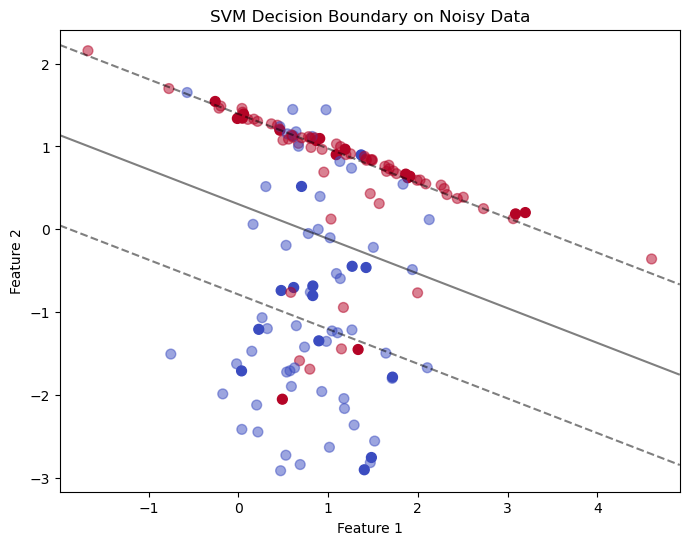

In [66]:
# Create a synthetic noisy dataset
X_noisy, y_noisy = make_classification(
    n_samples=150,
    n_features=2,  # Use only two features for visualization
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0.2,
    random_state=42
)

# Split the synthetic dataset into training and testing sets
X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(
    X_noisy, y_noisy, test_size=0.2, random_state=42
)

# Initialize SVM model
svm_model_noisy = SVC(kernel='linear', C=1)

# Train the model
svm_model_noisy.fit(X_train_noisy, y_train_noisy)

# Visualizing Decision Boundary for SVM
plt.figure(figsize=(8, 6))

# Plotting decision regions
plt.scatter(X_test_noisy[:, 0], X_test_noisy[:, 1], c=y_test_noisy, cmap='coolwarm', marker='o', s=50)
plt.scatter(X_train_noisy[:, 0], X_train_noisy[:, 1], c=y_train_noisy, cmap='coolwarm', marker='o', s=50, alpha=0.5)

# Plotting decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
Z = svm_model_noisy.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

plt.title('SVM Decision Boundary on Noisy Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

The decision boundary for SVM on noisy data is visualized using a scatter plot of data points and a contour plot representing the decision regions. Here's an explanation of the components:

Scatter Plot of Training Data Points:

The scattered points represent the training data from the Iris dataset. Each point is plotted based on its petal length and petal width. The color of each point corresponds to the class it belongs to.
Contour Plot for Decision Boundary:

The contour plot overlays the decision boundary on the scatter plot. The decision boundary separates different classes based on the SVM model's predictions.
The colors in the contour plot indicate the different decision regions. The regions are determined by the model's prediction for each combination of petal length and petal width.
The contour lines represent the boundaries between different regions.

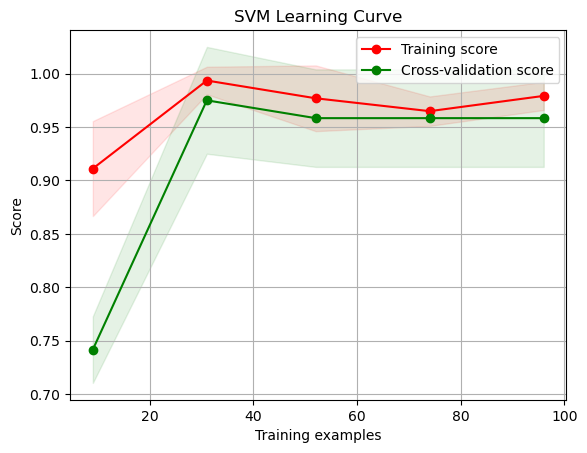

In [68]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(svm_model, "SVM Learning Curve", X_train, y_train, cv=5)
plt.show()


Learning Curve:
The above plot of a  learning curve helps visualize how the model's performance changes with varying amounts of training data.

# IN SUMMARY:

  - ## Accuracy and Confusion Matrix:

Overall accuracy for different models is reported, along with confusion matrices that provide a detailed breakdown of model predictions.
Accuracy for SVM and Logistic Regression models is printed, showing how well these models perform on the Iris dataset.

  - ## Decision Tree:
The Decision Tree model's accuracy and confusion matrix are presented, indicating its performance on the Iris dataset.

  - ## SVM Decision Boundary:
Decision boundaries for SVM are visualised on scatter plots for both sepal length vs. sepal width and petal length vs. petal width.
The SVM model successfully separates classes based on these features.

  - ## Logistic Regression Decision Boundary:
Decision boundaries for Logistic Regression are visualised on scatter plots for sepal length vs. sepal width and petal length vs. petal width.

  - ## Noisy Data SVM Decision Boundary:
SVM decision boundary on noisy data is visualized, showing how well the model copes with a dataset that contains some mislabeled instances

# In conclusion:
 the analysis demonstrates the application of various machine learning models, including SVM, Logistic Regression, and Decision Trees, on the Iris dataset. The models achieved high accuracy in classifying Iris species based on their sepal and petal characteristics.

***
## END

***